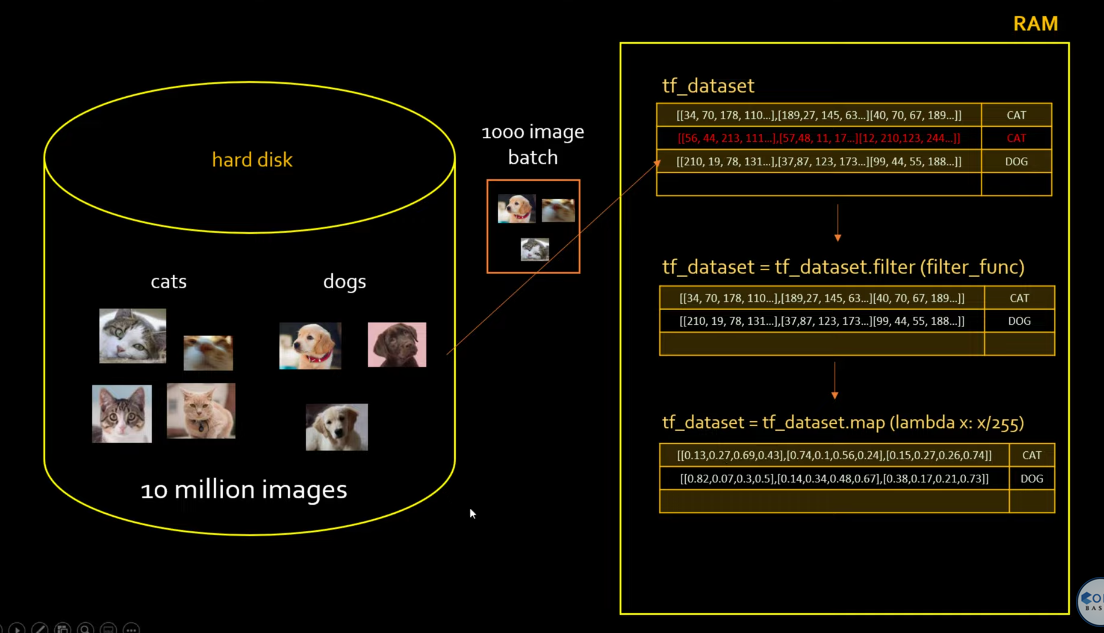

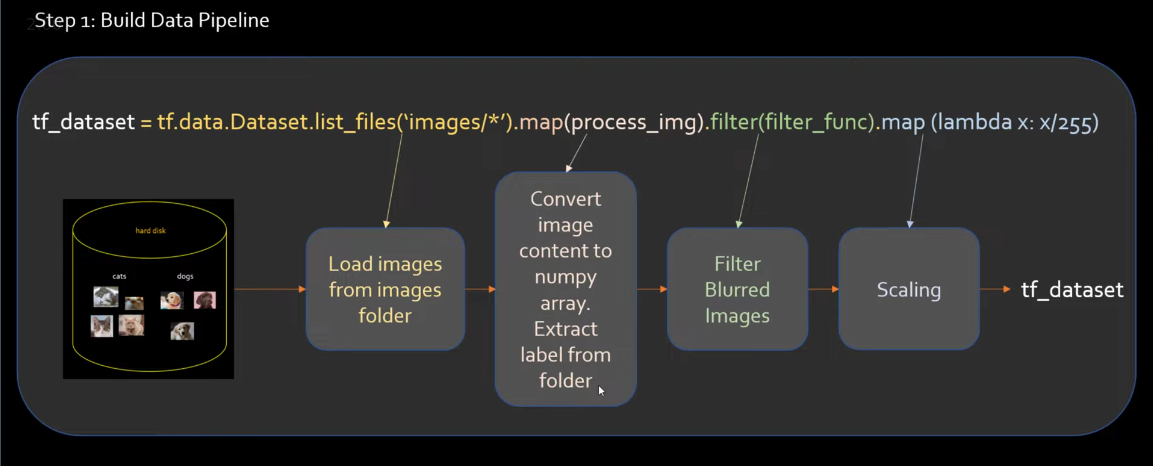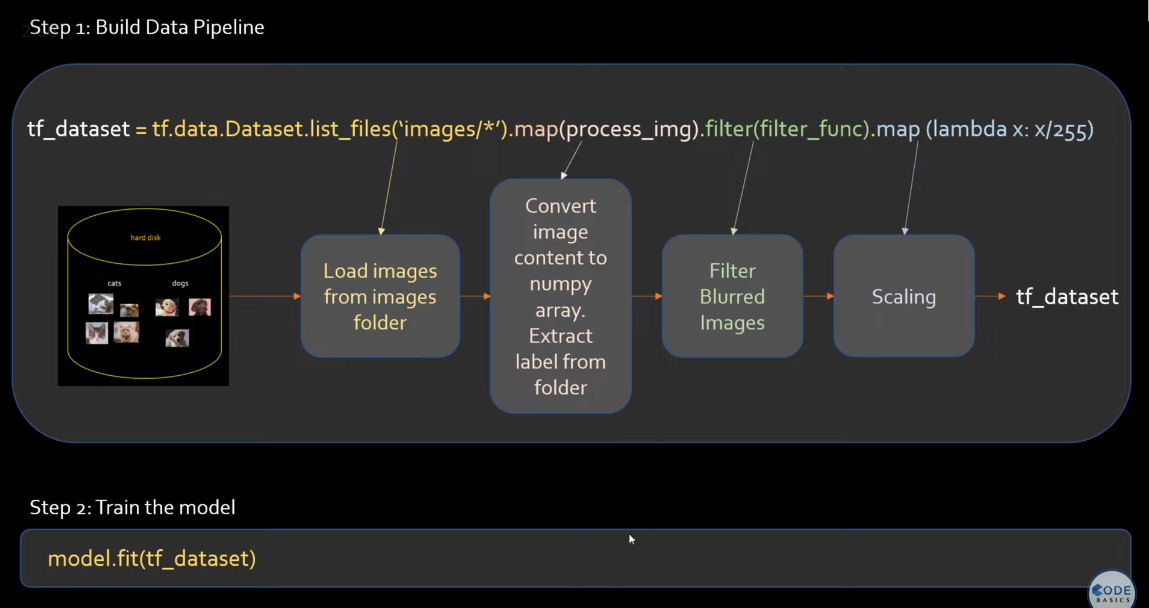

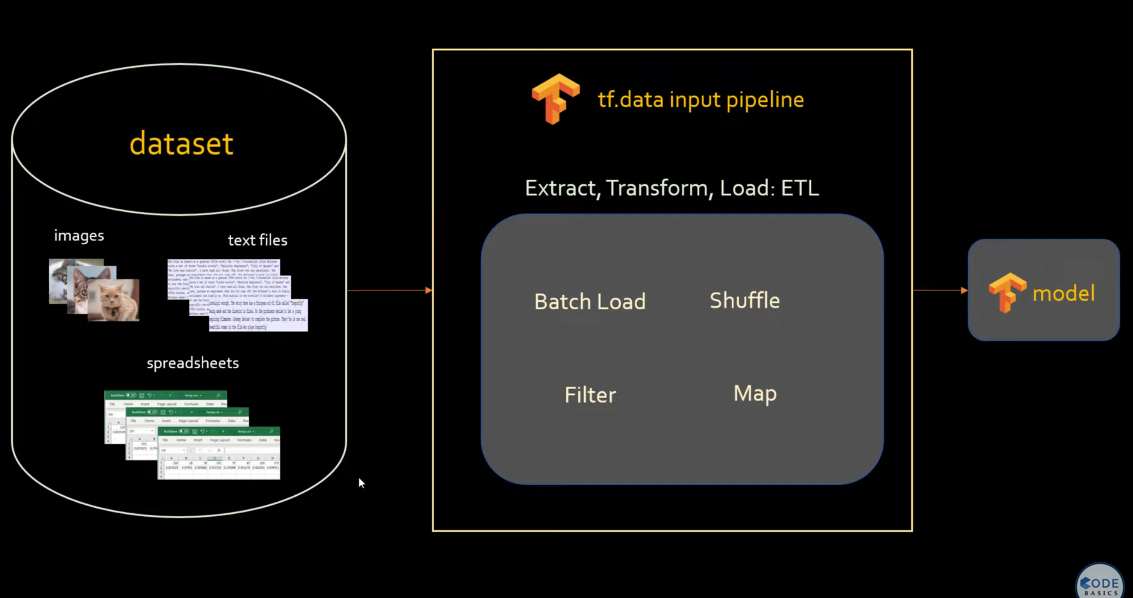

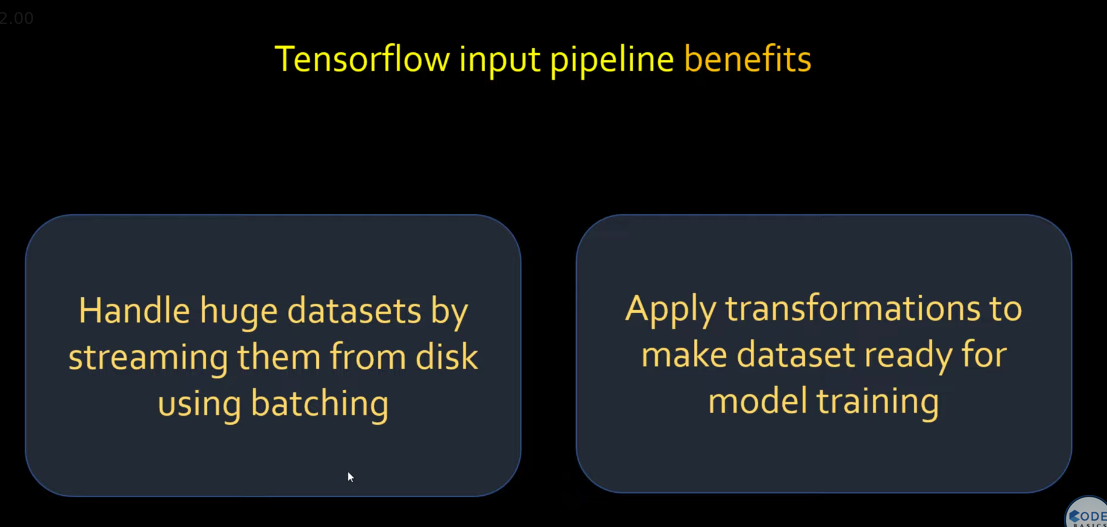

In [2]:
import tensorflow as tf

In [3]:
daily_sales_numbers = [21, 22, -108, 31, -1, 32, 34, 31]

In [4]:
tf_dataset = tf.data.Dataset.from_tensor_slices(daily_sales_numbers)

In [5]:
for sales in tf_dataset.as_numpy_iterator():
  print(sales)

21
22
-108
31
-1
32
34
31


In [6]:
tf_dataset = tf_dataset.filter(lambda x: x>0)

In [9]:
for sales in tf_dataset:
  print(sales.numpy())

21
22
31
32
34
31


In [11]:
for sales in tf_dataset.take(3):
  print(sales.numpy())

21
22
31


In [15]:
tf_dataset = tf_dataset.map(lambda x: x*74)
for sales in tf_dataset.as_numpy_iterator():
  print(sales)

629718096
659704672
929583856
959570432
1019543584
929583856


In [16]:
tf_dataset = tf_dataset.shuffle(4)
for sales in tf_dataset.as_numpy_iterator():
  print(sales)

659704672
629718096
929583856
1019543584
929583856
959570432


In [17]:
for sales_batch in tf_dataset.batch(3):
  print(sales_batch.numpy())

[659704672 929583856 929583856]
[ 959570432 1019543584  629718096]


In [20]:
tf_dataset_pipeline = tf.data.Dataset.from_tensor_slices(daily_sales_numbers).filter(lambda x: x>0).map(lambda y: y*74).shuffle(4).batch(3)

In [21]:
for sales_batch in tf_dataset_pipeline:
  print(sales_batch.numpy())

[2368 1554 2294]
[2294 2516 1628]


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
images_ds = tf.data.Dataset.list_files('/content/drive/MyDrive/datasets/images/*/*',shuffle=False)

In [27]:
for file in images_ds.shuffle(2):
  print(file.numpy())

b'/content/drive/MyDrive/datasets/images/cat/Untitled.jpg'
b'/content/drive/MyDrive/datasets/images/cat/Untitlcated.jpg'
b'/content/drive/MyDrive/datasets/images/cat/cat2.jpg'
b'/content/drive/MyDrive/datasets/images/dog/dog1.jpg'
b'/content/drive/MyDrive/datasets/images/dog/dog3.jpg'
b'/content/drive/MyDrive/datasets/images/dog/dog2.jpg'


In [28]:
class_names = ["cat","dog"]

In [29]:
image_count = len(images_ds)

In [30]:
train_size = int(image_count*0.8)

train_ds = images_ds.take(train_size)
test_ds = images_ds.skip(train_size)

In [31]:
len(train_ds), len(test_ds)

(4, 2)

In [34]:
import os
def get_label(file_path):
  return tf.strings.split(file_path, os.path.sep)[-2]

In [37]:
def process_image(file_path):
  label = get_label(file_path)

  img = tf.io.read_file(file_path)
  img = tf.image.decode_jpeg(img)
  img = tf.image.resize(img, [128, 128])

  return img, label

In [44]:
train_ds = train_ds.map(process_image)
for img, label in train_ds.take(2):
  print("Image: ",img)
  print("Label: ",label)

Image:  tf.Tensor(
[[[ 0.         1.         0.       ]
  [ 0.234375   0.765625   0.       ]
  [ 1.         0.         0.       ]
  ...
  [ 5.         1.         0.       ]
  [ 5.         1.         0.       ]
  [ 5.         1.         0.       ]]

 [[ 0.         1.         0.       ]
  [ 0.234375   0.765625   0.       ]
  [ 1.         0.         0.       ]
  ...
  [ 5.         1.         0.       ]
  [ 5.         1.         0.       ]
  [ 5.         1.         0.       ]]

 [[ 0.         1.         0.       ]
  [ 0.234375   0.765625   0.       ]
  [ 1.         0.         0.       ]
  ...
  [ 5.         1.         0.       ]
  [ 5.         1.         0.       ]
  [ 5.         1.         0.       ]]

 ...

 [[35.654785  17.26416    1.8066406]
  [47.595947  29.245605  10.9375   ]
  [50.581787  32.21045   16.382324 ]
  ...
  [41.167236  30.167236  23.453125 ]
  [57.928467  47.709717  41.31909  ]
  [65.89209   55.67334   49.282715 ]]

 [[37.919678  19.919678   1.2160645]
  [45.88257   27.6

In [45]:
def scale(image, label):
  return image/255, label

In [46]:
train_ds = train_ds.map(scale)
for image, label in train_ds.take(5):
  print("**Image: ", image.numpy()[0][0])
  print("**Label: ", label.numpy())

**Image:  [0.         0.00392157 0.        ]
**Label:  b'cat'
**Image:  [0.03529412 0.01960784 0.01568628]
**Label:  b'cat'
**Image:  [0.88235295 0.9137255  0.9647059 ]
**Label:  b'cat'
**Image:  [0.73762256 0.7572304  0.7729167 ]
**Label:  b'dog'
